In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [2]:
x = np.random.random_sample((8,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
x = np.append(x, np.random.normal(0, 40, 30))


y = np.random.random_sample((8,)) * 90  
for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))

y = np.append(y, np.random.normal(0, 40, 30))

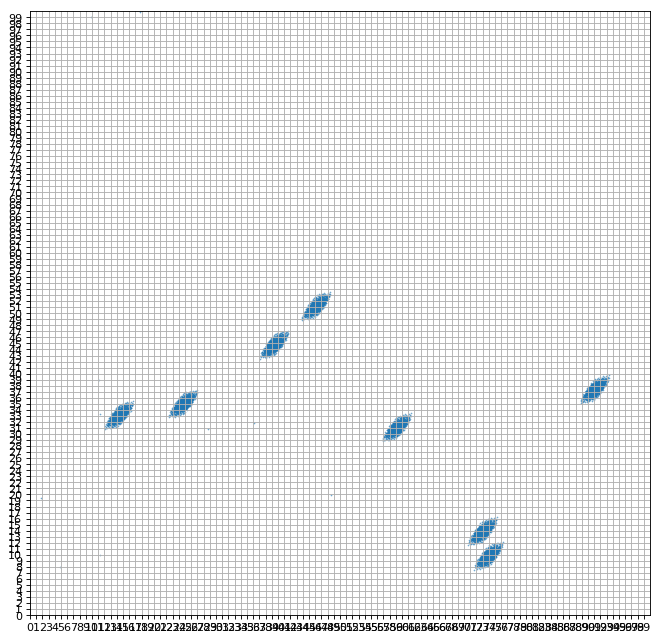

In [3]:
# This part is  a visualization only 
grid_size= 1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.1)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

In [4]:
cellSize=1
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
xTransformed = x - x1
print(x.size)

# print(xTransformed.size)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
# print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
# agg = np.column_stack((xTransformed, yTransformed))
# print(agg)


# np.array(setAgg[:,0], setAgg[:,1])

# setAgg=np.unique(agg, axis=0)

# print(setAgg.size)
# print(setAgg)

# plt.scatter(setAgg[:,0], setAgg[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.show()

8222


In [5]:
all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

dictCount={} 

for i in all_tuples:
    if(i in dictCount):
        dictCount[i] += 1
    else:
        dictCount[i] = 1


# print(dictCount)
# print(dictCount.values())
# values = np.asarray(dictCount.values())

values = np.fromiter(dictCount.values(), dtype=int)
# print(values.shape)
print(values)



keys = np.asarray(list(dictCount))
print(keys)
print(keys.shape)

[  4   1   3   1   4   1   3   8  27  42   7  35   7  42  17   2  64  66
  60  37  67 180 157 181 112  92  53  49  49 149 204 217 197 153   2   2
  23  43  52  58 162   4   5  11 122  82 108 165 217  99 211 207 204  93
  33 213 162  24 109  15  28  14  79 190  51  61  21   2  21  38   6  70
  74  37 149  47  62  96 137 135 126 179 115 171 129  74  42  81  40  74
  47   1   2   2  13  64  82  82  73  73  49   2   7   9  12  14   2  20
  46  47   3   7   7   8  65  66   1   2  23   7  19  44  46  22  19   1
   3   7  10   7   6   2   3   2   5   5   3   2   3   4   7  18   8   5
   6   6   5   4   4   4   1   1   1   1   2   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1]
[[  88.   35.]
 [  43.   48.]
 [  70.   11.]
 [  12.   30.]
 [  71.    7.]
 [  56.   28.]
 [  22.   32.]
 [  37.   42.]
 [  89.   35.]
 [  44.   49.]
 [  71.   11.]
 [  12.   31.]
 [  72.    7.]
 [  57.   29.]
 [  22.   33.]
 [  57.

In [6]:
# How to convert 

# https://stackoverflow.com/questions/23668509/dictionary-keys-and-values-to-separate-numpy-arrays
# Dictionary keys and values to separate numpy arrays
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)


values_cliped = (values - 30).clip(min=0)
print(values_cliped)


print(np.where( values_cliped !=0 ))



dataForClustering=keys[np.where( values_cliped !=0 )]
print(dataForClustering)


[  0   0   0   0   0   0   0   0   0  12   0   5   0  12   0   0  34  36
  30   7  37 150 127 151  82  62  23  19  19 119 174 187 167 123   0   0
   0  13  22  28 132   0   0   0  92  52  78 135 187  69 181 177 174  63
   3 183 132   0  79   0   0   0  49 160  21  31   0   0   0   8   0  40
  44   7 119  17  32  66 107 105  96 149  85 141  99  44  12  51  10  44
  17   0   0   0   0  34  52  52  43  43  19   0   0   0   0   0   0   0
  16  17   0   0   0   0  35  36   0   0   0   0   0  14  16   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]
(array([  9,  11,  13,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  37,  38,  39,  40,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,
        62,  63

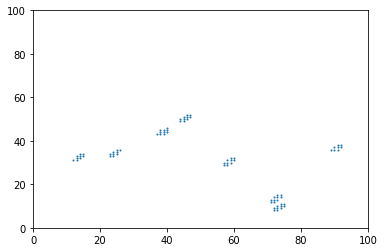

In [7]:
plt.scatter(dataForClustering[:,0], dataForClustering[:,1], s=1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

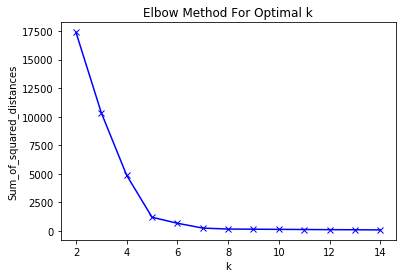

8
[[72.5        13.5       ]
 [38.8        44.2       ]
 [24.33333333 34.44444444]
 [90.75       36.875     ]
 [58.5        30.5       ]
 [13.66666667 32.55555556]
 [45.5        50.5       ]
 [73.5         9.5       ]]


In [9]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(dataForClustering)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.9 here is just a threshhold 
    if(ratio < 1.5):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(dataForClustering)
print(km.cluster_centers_)
